In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import numpy as np
import geometric_clustering as gc
from graph_library import generate_SBM, assign_graph_metadata
import networkx as nx
import scipy as sc
import pylab as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FFMpegWriter
from geometric_clustering import plotting
import matplotlib.colors as col

Cupy is not installed, GPU functions will not work.


# Generate graph

In [3]:
graph, pos = generate_SBM(params = {'n':[30,30,30,30],
                                    'p':[[0.7, 0.1, 0.02, 0.02],
                                         [0.1, 0.8, 0.02, 0.02],
                                         [0.02, 0.02, 0.85, 0.1],
                                         [0.02, 0.02, 0.1, 0.6]],
                                    'seed': 1})        
graph = nx.convert_node_labels_to_integers(graph)
graph = assign_graph_metadata(graph, pos=pos)

# Plot graph and geodesics between two communities

<IPython.core.display.Javascript object>


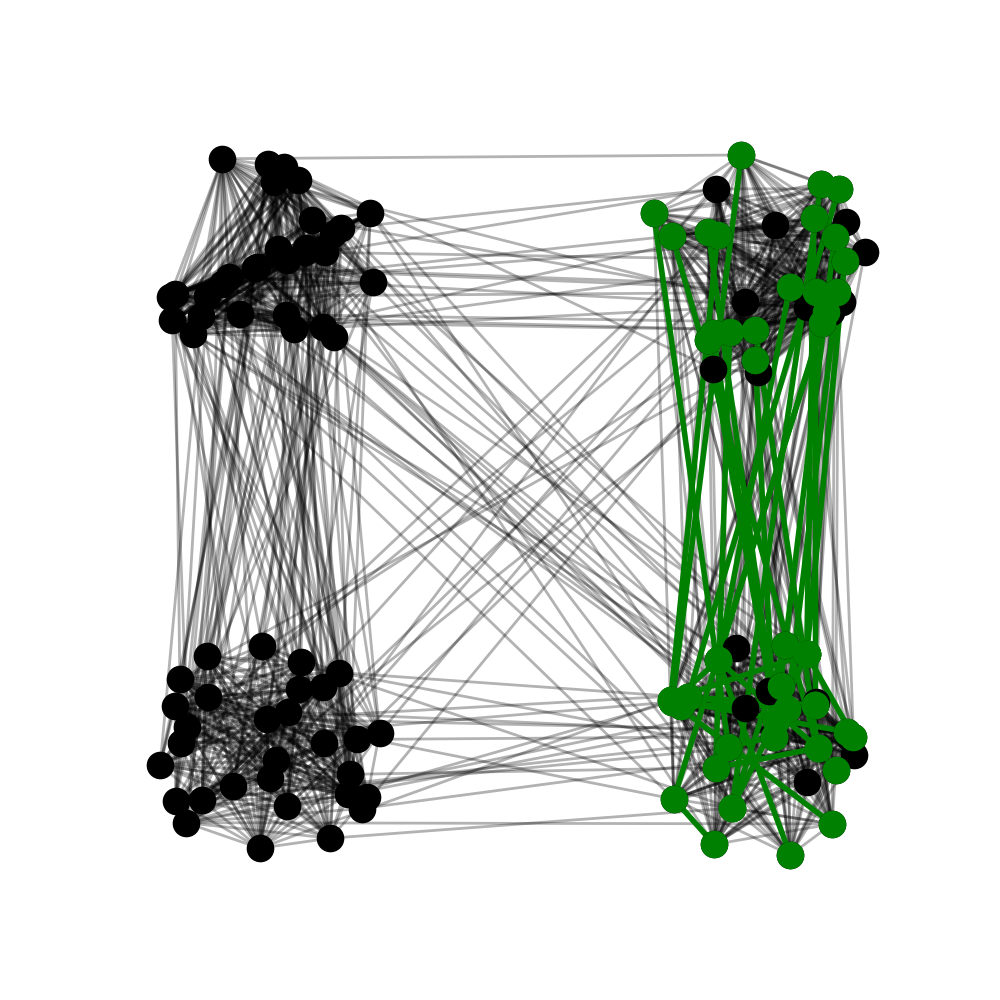

In [4]:
plt.figure(figsize=(5,5))
nx.draw_networkx_nodes(graph,pos,node_size=80,node_color='k')
nx.draw_networkx_edges(graph,pos,edge_color='k',width=1,alpha=0.3)    
for i in range(20):
    path = nx.shortest_path(graph,source=i,target=30+i)
    path_edges = list(zip(path,path[1:]))
    nx.draw_networkx_nodes(graph,pos,nodelist=path,node_size=80,node_color='g')
    nx.draw_networkx_edges(graph,pos,edgelist=path_edges,edge_color='g',width=2)  
 
plt.box(on=None)
#plt.savefig('geodesics.svg')    

# Compute curvatures

In [5]:
times = np.logspace(-2, 2, 50)
kappas = gc.compute_curvatures(graph, times)

  2%|▏         | 1/50 [00:02<01:39,  2.04s/it]

0.7609119415283203


  4%|▍         | 2/50 [00:02<01:05,  1.36s/it]

0.798576831817627


  6%|▌         | 3/50 [00:03<00:55,  1.18s/it]

0.8747661113739014


  8%|▊         | 4/50 [00:05<00:54,  1.19s/it]

1.1039810180664062


 10%|█         | 5/50 [00:06<00:55,  1.23s/it]

1.21207594871521


 12%|█▏        | 6/50 [00:07<00:55,  1.25s/it]

1.2015328407287598


 14%|█▍        | 7/50 [00:08<00:54,  1.27s/it]

1.2252860069274902


 16%|█▌        | 8/50 [00:10<00:53,  1.28s/it]

1.215846061706543


 18%|█▊        | 9/50 [00:11<00:53,  1.30s/it]

1.2435729503631592


 20%|██        | 10/50 [00:12<00:52,  1.31s/it]

1.2201228141784668


 22%|██▏       | 11/50 [00:14<00:50,  1.30s/it]

1.1927919387817383


 24%|██▍       | 12/50 [00:15<00:50,  1.33s/it]

1.3133649826049805


 26%|██▌       | 13/50 [00:17<00:49,  1.35s/it]

1.276231050491333


 28%|██▊       | 14/50 [00:18<00:49,  1.37s/it]

1.322807788848877


 30%|███       | 15/50 [00:19<00:48,  1.38s/it]

1.3137941360473633


 32%|███▏      | 16/50 [00:21<00:47,  1.41s/it]

1.3670198917388916


 34%|███▍      | 17/50 [00:22<00:46,  1.41s/it]

1.3033208847045898


 36%|███▌      | 18/50 [00:24<00:45,  1.42s/it]

1.3285510540008545


 38%|███▊      | 19/50 [00:25<00:44,  1.43s/it]

1.3409790992736816


 40%|████      | 20/50 [00:27<00:43,  1.44s/it]

1.3273441791534424


 42%|████▏     | 21/50 [00:28<00:41,  1.43s/it]

1.2921180725097656


 44%|████▍     | 22/50 [00:29<00:39,  1.41s/it]

1.2723100185394287


 46%|████▌     | 23/50 [00:31<00:38,  1.42s/it]

1.310840129852295


 48%|████▊     | 24/50 [00:32<00:35,  1.37s/it]

1.1406750679016113


 50%|█████     | 25/50 [00:33<00:34,  1.36s/it]

1.2271039485931396


 52%|█████▏    | 26/50 [00:35<00:32,  1.37s/it]

1.2430319786071777


 54%|█████▍    | 27/50 [00:36<00:31,  1.36s/it]

1.1940240859985352


 56%|█████▌    | 28/50 [00:37<00:29,  1.36s/it]

1.2186551094055176


 58%|█████▊    | 29/50 [00:39<00:28,  1.35s/it]

1.1929271221160889


 60%|██████    | 30/50 [00:40<00:26,  1.35s/it]

1.1894137859344482


 62%|██████▏   | 31/50 [00:41<00:24,  1.31s/it]

1.078071117401123


 64%|██████▍   | 32/50 [00:43<00:23,  1.31s/it]

1.1287050247192383


 66%|██████▌   | 33/50 [00:44<00:22,  1.30s/it]

1.1080172061920166


 68%|██████▊   | 34/50 [00:45<00:20,  1.31s/it]

1.1281869411468506


 70%|███████   | 35/50 [00:47<00:19,  1.31s/it]

1.0779378414154053


 72%|███████▏  | 36/50 [00:48<00:18,  1.34s/it]

1.1503207683563232


 74%|███████▍  | 37/50 [00:49<00:17,  1.36s/it]

1.1199591159820557


 76%|███████▌  | 38/50 [00:51<00:17,  1.43s/it]

1.21754789352417


 78%|███████▊  | 39/50 [00:53<00:15,  1.45s/it]

1.1251311302185059


 80%|████████  | 40/50 [00:54<00:14,  1.49s/it]

1.1637921333312988


 82%|████████▏ | 41/50 [00:56<00:13,  1.55s/it]

1.1631669998168945


 84%|████████▍ | 42/50 [00:57<00:12,  1.57s/it]

1.0689737796783447


 86%|████████▌ | 43/50 [00:59<00:11,  1.62s/it]

1.0537798404693604


 88%|████████▊ | 44/50 [01:01<00:10,  1.70s/it]

1.0747430324554443


 90%|█████████ | 45/50 [01:04<00:09,  1.97s/it]

1.0496950149536133


 92%|█████████▏| 46/50 [01:06<00:08,  2.18s/it]

0.8553049564361572


 94%|█████████▍| 47/50 [01:09<00:06,  2.33s/it]

0.7933149337768555


 96%|█████████▌| 48/50 [01:12<00:05,  2.51s/it]

0.7759838104248047


 98%|█████████▊| 49/50 [01:15<00:02,  2.69s/it]

0.750140905380249


100%|██████████| 50/50 [01:18<00:00,  1.58s/it]

0.7186930179595947


<IPython.core.display.Javascript object>


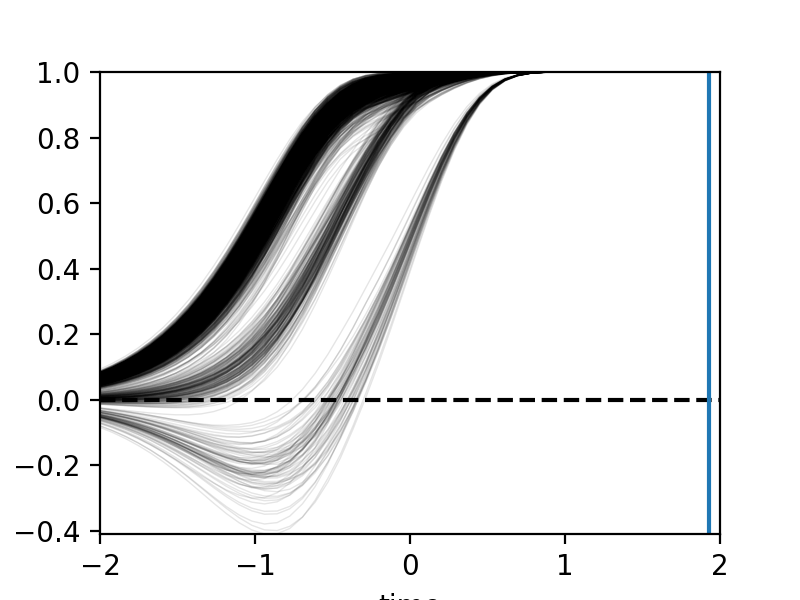

In [10]:
plotting.plot_edge_curvatures(times, kappas, figsize=(4,3))
plt.xlabel('time')
plt.ylabel(r'$\kappa$')

plt.axvline(times[28])
plt.axvline(times[34])
#plt.savefig('curvature_trajectories.svg')

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121)

kappa = kappas[25]
plotting.plot_graph(
    graph,
    edge_color=kappa,
    node_size=20,
    edge_width=1,
    node_colors='k',
    colormap="standard",
    vmin=-.5,
    vmax=0.5,
)

plt.subplot(122)

kappa = kappas[34]
plotting.plot_graph(
    graph,
    edge_color=kappa,
    node_size=20,
    edge_width=1,
    node_colors='k',
    colormap="standard",
    vmin=-.5,
    vmax=0.5,
)

#plt.savefig('curvature_on_graph.svg')

# Compute geodesic distance matrix

In [ ]:
dist = gc.curvature.compute_distance_geodesic(graph)

plt.figure(figsize=(4,3.5))
plt.imshow(dist,aspect='auto', origin='auto',cmap='Greys')

plt.axvline(6, c='C0',lw=3,ls='--')
plt.axhline(16, c='C1',lw=3,ls='--')

plt.xlabel('Node id')
plt.ylabel('Node id')
plt.colorbar(label=r'$d_{ij}$')
plt.axis('square')

#plt.savefig('distance.svg', bbox_inches='tight')

# Functions to compute measures and make plots

In [ ]:
# compute all neighbourhood densities
def mx_comp(graph, T, i):
    
    degrees = np.array([graph.degree[i] for i in graph.nodes])
    L = nx.laplacian_matrix(graph).dot(sc.sparse.diags(1.0 / degrees))
    
    N = len(graph.nodes)

    def delta(i, n):
        p0 = np.zeros(n)
        p0[i] = 1.
        return p0

    mx_all = [] 
    mx_tmp = delta(i, N) #set initial condition
    T = [0,] + list(T) #add time 0
    
    for i in range(len((T))-1): 
        #compute exponential by increments (faster than from 0)
        mx_tmp = sc.sparse.linalg.expm_multiply(-(T[i+1]-T[i])*L, mx_tmp)
        mx_all.append(sc.sparse.lil_matrix(mx_tmp))

    return mx_all


# compute curvature for an edge ij
def zeta_comp(mx_all, dist, it, e):
    import ot
    
    i, j = e[0], e[1]
    nt = len(mx_all[0][0])
    K = np.zeros(nt)

    Nx = np.array(mx_all[i][1][it]).flatten()
    Ny = np.array(mx_all[j][1][it]).flatten()
    mx = mx_all[i][0][it].toarray().flatten()
    my = mx_all[j][0][it].toarray().flatten()

    dNxNy = dist[Nx,:][:,Ny].copy(order='C')
    zeta = ot.emd(mx, my, dNxNy) 
            
    return zeta

# plot the curvature on the graph for a given time t
def plot_measure_graph(t, mx1, mx2, kappas, graph, pos, node_size = 100, edge_width = 1, ax=None):

    edge_vmin = -np.max(abs(kappas[:,t]))
    edge_vmax = np.max(abs(kappas[:,t]))
              
    vmin = 0# -np.max(abs(mx))
    vmax = 1#np.max(abs(mx))
    mx1 /= np.max(mx1)
    mx2 /= np.max(mx2)

    node_size1, node_size2 = mx1*node_size, mx2*node_size 

    from matplotlib.markers import MarkerStyle
    ms1 = MarkerStyle('o', fillstyle = 'left')
    ms2 = MarkerStyle('o', fillstyle = 'right')
    node_color1 = 'C0'
    node_color2 = 'C1'

    nodes = nx.draw_networkx_nodes(graph, pos = pos, node_size = node_size1, node_color = node_color1, 
                                   vmin = vmin, vmax = vmax, cmap=plt.get_cmap('viridis'),node_shape=ms1,
                                  ax=ax)
    
    nodes = nx.draw_networkx_nodes(graph, pos = pos, node_size = node_size2, node_color = node_color2, 
                                   vmin = vmin, vmax = vmax, cmap=plt.get_cmap('viridis'),node_shape=ms2,
                                   ax=ax)
    
    #edges = nx.draw_networkx_edges(graph, pos = pos, width = edge_width, alpha=0.3, ax=ax)

    limits = plt.axis('off') #turn axis off
    
    return ax


def plot_transport_plan(zeta, mx1, mx2, ax1, ax2, ax3):       
   
    ax1.imshow((zeta.T), cmap='viridis', norm=col.Normalize(vmin=np.min(zeta), vmax=0.05*np.max(zeta)), aspect='auto', origin='auto')
    ax1.set_xlabel('Node id')
    ax1.set_ylabel('Node id')
  
    ax2.bar(np.arange(len(mx1)), mx1,color='C0',log=False)
    ax2.set_xlim(-0.5,len(mx1)-0.5)
    ax2.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    ax2.set_ylabel('$p_x$')
    ax2.set_ylim([0,0.03])
    
    ax3.barh(np.arange(len(mx2)),mx2,color='C1',log=False)
    ax3.set_ylim(-0.5,len(mx2)-0.5)
    ax3.set_xlabel('$p_y$')
    ax3.set_xlim([0,0.03])

    ax3.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelleft=False)

    ax1.axvline(29.5,c='w',ls='--',lw=0.8)
    ax1.axvline(29.5,c='w',ls='--',lw=0.8)
    ax1.axvline(59.5,c='w',ls='--',lw=0.8)
    ax1.axvline(59.5,c='w',ls='--',lw=0.8)
    ax1.axvline(89.5,c='w',ls='--',lw=0.8)
    ax1.axvline(89.5,c='w',ls='--',lw=0.8)
    
    ax1.axhline(29.5,c='w',ls='--',lw=0.8)
    ax1.axhline(29.5,c='w',ls='--',lw=0.8)
    ax1.axhline(59.5,c='w',ls='--',lw=0.8)
    ax1.axhline(59.5,c='w',ls='--',lw=0.8)
    ax1.axhline(89.5,c='w',ls='--',lw=0.8)
    ax1.axhline(89.5,c='w',ls='--',lw=0.8)
    
    return ax1, ax2, ax3

# Plot graph with snapshots of diffusion measures

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121)

t = 26
i = 1
j = 5

mx_1 = mx_comp(graph, times, i)
mx_2 = mx_comp(graph, times, j)
mx1, mx2 = mx_1[t].toarray().flatten(), mx_2[t].toarray().flatten()

plot_measure_graph(t, mx1, mx2, kappas, graph, pos, node_size = 1000, edge_width = 1)
nx.draw_networkx_edges(graph, pos = pos, width = 1, alpha=0.3)
nx.draw_networkx_edges(graph, pos = pos, edgelist=[(i,j),], edge_color='g',width = 3)
ax1.set_title(np.log10(times[t]))


plt.subplot(122)

t = 26
i = 1
j = 62

mx_1 = mx_comp(graph, times, i)
mx_2 = mx_comp(graph, times, j)
mx1, mx2 = mx_1[t].toarray().flatten(), mx_2[t].toarray().flatten()

plot_measure_graph(t, mx1, mx2, kappas, graph, pos, node_size = 1000, edge_width = 1)
nx.draw_networkx_edges(graph, pos = pos, width = 1, alpha=0.3)
nx.draw_networkx_edges(graph, pos = pos, edgelist=[(i,j),], edge_color='g',width = 3)

ax2.set_title(np.log10(times[t]))

#plt.savefig('mxs.svg', bbox_inches='tight')

# Plot transport maps

In [ ]:
import ot

t = 25
i = 1
j = 5

mx_all = []
for k in range(nx.number_of_nodes(graph)):
    mx_all.append(mx_comp(graph, times, k))

mx = mx_all[i][t].toarray().flatten()
my = mx_all[j][t].toarray().flatten()

#dNxNy = dist[Nx,:][:,Ny].copy(order='C')
zeta = ot.emd(mx, my, dist) 

fig= plt.figure(figsize=(5,5))
gs = gridspec.GridSpec(2, 2, height_ratios = [ 0.2, 1], width_ratios = [1,0.2] )
gs.update(wspace=0.00)
gs.update(hspace=0)
ax1 = plt.subplot(gs[1, 0])
ax2 = plt.subplot(gs[0, 0])
ax3 = plt.subplot(gs[1, 1])

plot_transport_plan(zeta, 
                    mx_all[i][t].toarray().flatten(), 
                    mx_all[j][t].toarray().flatten(), 
                    ax1, ax2, ax3)

#plt.savefig('zeta_within.svg', bbox_inches='tight')

In [ ]:
import ot

t = 25
i = 1
j = 62

mx_all = []
for k in range(nx.number_of_nodes(graph)):
    mx_all.append(mx_comp(graph, times, k))

mx = mx_all[i][t].toarray().flatten()
my = mx_all[j][t].toarray().flatten()

zeta = ot.emd(mx, my, dist) 

fig= plt.figure(figsize=(5,5))
gs = gridspec.GridSpec(2, 2, height_ratios = [ 0.2, 1], width_ratios = [1,0.2] )
gs.update(wspace=0.00)
gs.update(hspace=0)
ax1 = plt.subplot(gs[1, 0])
ax2 = plt.subplot(gs[0, 0])
ax3 = plt.subplot(gs[1, 1])

plot_transport_plan(zeta, 
                    mx_all[i][t].toarray().flatten(), 
                    mx_all[j][t].toarray().flatten(), 
                    ax1, ax2, ax3)

#plt.savefig('zeta_between.svg', bbox_inches='tight')